# Load the Data

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams['figure.figsize'] = [20, 14]

In [2]:
decision_data = pd.read_csv('/home/tony/Desktop/491/db_backups/day9/decision_stats.csv')
decision_data.head()

,decision_id,user_id,sentence_id,mode,relative_mask_pos,relative_unmask_pos,decision,status,is_correct
0,1,1,1,MODE_0,0,0,SEPARATE,SEPARATE,True
1,2,1,2,MODE_0,0,0,SEPARATE,ADJACENT,False
2,3,1,3,MODE_0,0,0,SEPARATE,SEPARATE,True
3,4,1,4,MODE_0,0,0,ADJACENT,ADJACENT,True
4,5,1,5,MODE_0,0,0,ADJACENT,ADJACENT,True


In [3]:
sentence_data = pd.read_csv('/home/tony/Desktop/491/db_backups/day9/sentence_stats.csv')
sentence_data.head()

,sentence_id,text,pos,clitic,status,decision_count
0,1,Karadağ Üniversitesi siyasi bilimler profesörü...,17,de,SEPARATE,10
1,2,10 yıl önceye göre kıyasladığımızda asgari ücr...,4,da,ADJACENT,10
2,3,"Sayacatürk Köyü'nden de Şaban Yardibi , Salih ...",2,de,SEPARATE,10
3,4,Sistem ilk olarak 21 Ocak Pazartesi'den itibar...,9,de,ADJACENT,10
4,5,Dünkü at yarışında müthiş bir mücadele yaşandı.,2,da,ADJACENT,10


# Define Success Metrics

In [4]:
def get_accuracy_score(correct_count, sep_count, adj_count):
    return correct_count / (sep_count + adj_count)

def get_indecision_score(sep_count, adj_count, ind_count):
    return ind_count / (sep_count + adj_count + ind_count)

# This is added in the last minute upon the request of Suzan hoca
def get_general_score(correct_count, incorrect_count, ind_count):
    return correct_count/(incorrect_count + ind_count)

# Analysis

## Mode 1 & 6 Position Specific Analysis

### Calculate position specific measurements

In [5]:
def get_pos_statistics(mode, init_pos, final_pos):

    groupby_col = 'relative_mask_pos' if mode == 'MODE_1' else 'relative_unmask_pos'
    
    # Calculate position specific measures
    filter_1 = decision_data['mode']==mode
    filter_2 = decision_data['is_correct']=='True'
    correct_count_per_pos = decision_data[ filter_1 & filter_2].groupby(groupby_col)['is_correct'].count().to_dict()

    filter_2 = decision_data['decision']=='ADJACENT'
    adj_count_per_pos = decision_data[ filter_1 & filter_2].groupby(groupby_col)['is_correct'].count().to_dict()

    filter_2 = decision_data['decision']=='SEPARATE'
    sep_count_per_pos = decision_data[ filter_1 & filter_2].groupby(groupby_col)['is_correct'].count().to_dict()

    filter_2 = decision_data['decision']=='INDECISIVE'
    ind_count_per_pos = decision_data[ filter_1 & filter_2].groupby(groupby_col)['is_correct'].count().to_dict()

    interested_positions = list(range(init_pos, final_pos))
    interested_positions.remove(0) # we are interested in pos 0. It is never masked.

    accuracy_score_per_pos, indecision_score_per_pos, decision_count_per_pos = {},{},{}

    for pos in interested_positions:

        correct_count = correct_count_per_pos[pos] if pos in correct_count_per_pos else 0
        adj_count = adj_count_per_pos[pos] if pos in adj_count_per_pos else 0
        sep_count = sep_count_per_pos[pos] if pos in sep_count_per_pos else 0
        ind_count = ind_count_per_pos[pos] if pos in ind_count_per_pos else 0

        decision_count_per_pos[pos] = adj_count + sep_count + ind_count
        accuracy_score_per_pos[pos] = get_accuracy_score(correct_count, sep_count, adj_count)
        indecision_score_per_pos[pos] = get_indecision_score(sep_count, adj_count, ind_count)
        
    return decision_count_per_pos, accuracy_score_per_pos, indecision_score_per_pos

### Plot Accuracy and Indecision Scores for each Relative Position in Mode 1

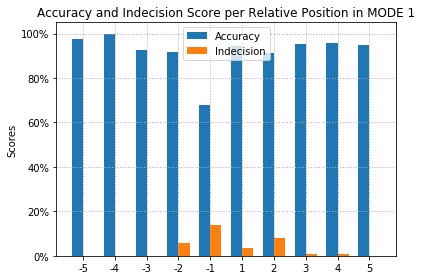

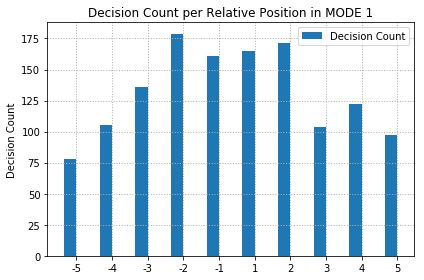

In [6]:
decision_count_per_pos, accuracy_score_per_pos, indecision_score_per_pos = get_pos_statistics('MODE_1', -5, 6)

# Give the results in percentage
acc = [ x * 100 for x in list(accuracy_score_per_pos.values())]
ind = [ x * 100 for x in list(indecision_score_per_pos.values())]

labels = list(accuracy_score_per_pos.keys())
accuracy_scores = acc
indecision_scores = ind

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, indecision_scores, width, label='Indecision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Indecision Score per Relative Position in MODE 1')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(linestyle=':',linewidth=1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

fig.tight_layout()

plt.show()

## Decision Count Plot

labels = list(decision_count_per_pos.keys())
decision_counts = list(decision_count_per_pos.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, decision_counts, width, label='Decision Count')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decision Count')
ax.set_title('Decision Count per Relative Position in MODE 1')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(linestyle=':',linewidth=1)


fig.tight_layout()

plt.show()

## Mode 6

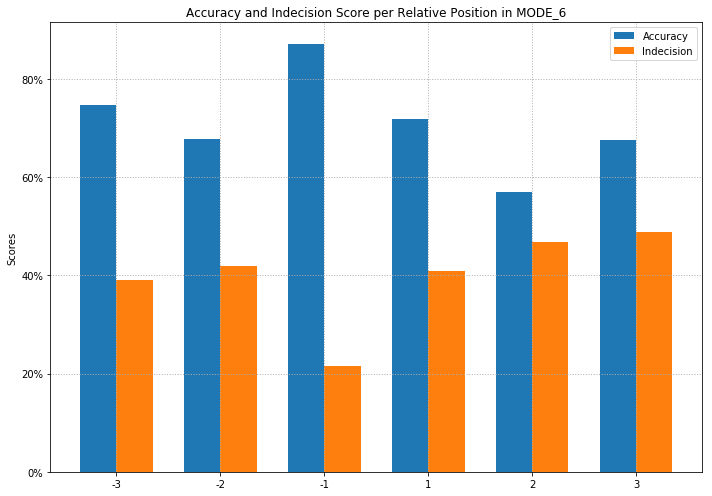

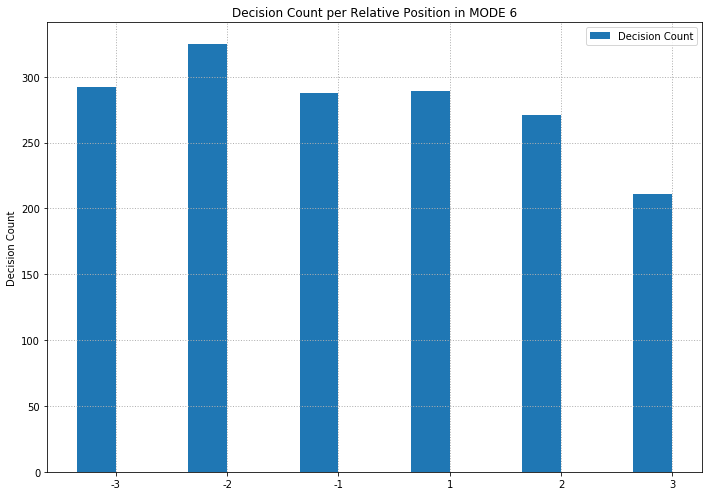

In [8]:
decision_count_per_pos, accuracy_score_per_pos, indecision_score_per_pos = get_pos_statistics('MODE_6', -3, 4)


labels = list(accuracy_score_per_pos.keys())
accuracy_scores = [ x * 100 for x in list(accuracy_score_per_pos.values())]
indecision_scores = [ x * 100 for x in list(indecision_score_per_pos.values())]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.rcParams['figure.figsize'] = [10, 7]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, indecision_scores, width, label='Indecision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Indecision Score per Relative Position in MODE_6')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(linestyle=':',linewidth=1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

fig.tight_layout()

plt.show()

# Decision Count Plot

labels = list(decision_count_per_pos.keys())
decision_counts = list(decision_count_per_pos.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#plt.rcParams['figure.figsize'] = [10, 7]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, decision_counts, width, label='Decision Count')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decision Count')
ax.set_title('Decision Count per Relative Position in MODE 6')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(linestyle=':',linewidth=1)


fig.tight_layout()

plt.show()
